In [210]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from thermography_dataset_one_layer import ThermDataset
%matplotlib inline

In [211]:
# arguments for training
args = {'lr':0.005,
        'epochs':20000,
        'noise':0.01,
        'train size':0.7,
        'spec scale':10**12,
        'loss function':nn.L1Loss(),
        'optimizer function': torch.optim.Adam
        }

num_layers = 11

In [212]:
# fn to convert dataframes to tensors
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Preparing Data

In [213]:
df = pd.read_excel('wide_range.xlsx')

In [214]:
# first columns of excel sheet is temperature data, then spectral data
y = df.iloc[:,:num_layers]
X = df.iloc[:,num_layers:]

# scale the spectral data appropriately
X = X.apply(lambda x: x*args['spec scale'])

# add noise
noise = np.random.normal(loc=0, scale=args['noise'], size=X.shape)
X = X + noise

# split the data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=args['train size'], random_state=101)

# index the data
X_train.index = range(len(X_train))
X_test.index = range(len(X_test))

In [215]:
X_train

,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
0,0.040111,0.049390,0.070545,0.053430,0.086921,0.067160,0.113496,0.075887,0.107046,0.147663,...,3.662488,3.701520,3.764349,3.789816,3.796063,3.812446,3.786884,3.687755,3.564098,3.447141
1,0.054637,0.028363,0.044205,0.039085,0.039988,0.064495,0.075136,0.058805,0.094263,0.108579,...,2.327210,2.342254,2.390793,2.428378,2.444002,2.457469,2.446026,2.398245,2.295244,2.244891
2,0.015304,-0.000496,0.018373,0.005492,0.031148,0.023175,0.025134,0.024932,0.046174,0.028679,...,1.781437,1.812696,1.859183,1.893200,1.901440,1.900046,1.911003,1.850281,1.824701,1.750304
3,0.003902,0.020104,0.013708,0.007695,0.041014,0.019600,0.028476,0.044950,0.071887,0.087751,...,4.612419,4.694102,4.722559,4.795603,4.802754,4.796452,4.760839,4.624615,4.446448,4.296177
4,0.000456,0.034734,0.024419,0.026539,0.016376,0.016495,0.044723,0.019069,0.043691,0.031657,...,1.639581,1.681342,1.710940,1.738246,1.759187,1.749204,1.750413,1.722587,1.656785,1.608482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0.009401,0.007601,0.016205,0.028480,0.015518,0.008616,0.026072,0.014330,0.045639,0.020579,...,1.728374,1.774788,1.794491,1.822565,1.846650,1.858329,1.843472,1.804504,1.748961,1.678105
1536,0.019207,0.028873,0.015687,0.024464,0.014702,0.036303,0.037280,0.041004,0.053481,0.062219,...,1.883702,1.919999,1.935957,1.968612,1.996347,1.989466,2.006313,1.956249,1.918589,1.840209
1537,0.041284,0.029396,0.058377,0.045370,0.083049,0.072184,0.107617,0.100653,0.120852,0.145387,...,5.345985,5.402019,5.453918,5.496236,5.510874,5.519832,5.451442,5.325711,5.112780,4.909360
1538,0.030526,0.018090,0.015050,0.002464,0.024600,0.017612,0.028566,0.036341,0.041228,0.070208,...,2.573268,2.616174,2.670744,2.694065,2.705457,2.721735,2.695305,2.636245,2.554813,2.465303


In [216]:
y_train

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
805,370.341309,328.561339,326.246196,325.960978,337.115108,338.011684,329.244973,338.854172,334.003205,331.473263,344.660386
1798,358.717780,321.142036,335.121747,323.227587,334.855686,331.980768,331.899256,332.369302,336.197365,344.170862,318.387290
193,303.578596,296.012106,320.139477,331.612634,343.149874,341.599287,327.050020,312.050438,300.909822,290.052707,305.241303
162,281.108362,326.802138,327.622403,330.956774,328.315642,325.316098,330.881045,323.297827,335.718231,335.832163,359.882238
1211,300.756094,302.244654,302.319500,307.933527,316.877701,315.324771,318.254083,318.875332,313.324653,307.896394,301.072836
...,...,...,...,...,...,...,...,...,...,...,...
599,274.142753,312.028924,305.203144,306.792005,301.311853,291.127893,298.271076,303.973224,308.318167,319.322458,303.811769
1599,318.512434,351.712729,343.852709,337.011663,325.408620,325.728092,318.063111,309.798561,314.474813,297.388722,307.688462
1361,370.224132,340.547318,330.792273,325.245505,318.753576,321.749459,328.052407,338.216759,343.711867,361.540581,369.965830
1547,308.722907,320.029113,305.872919,303.670763,308.517581,320.283005,326.395634,328.204725,333.495631,311.017505,324.166657


Autoencoder

In [217]:
# define AE
class Autoencoder(nn.Module):
    def __init__(self, input_size, bottleneck_size):
        super(Autoencoder, self).__init__()
        # encoder compresses the input data into a lower-dimensional representation (bottleneck)
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 75),
            nn.ReLU(),
            nn.Linear(75, 60),
            nn.ReLU(),
            nn.Linear(60, 45),
            nn.ReLU(),
            nn.Linear(45, 30),
            nn.ReLU(),
            nn.Linear(30, bottleneck_size),
            nn.ReLU()
        )
        # decoder reconstructs the input data from the bottleneck representation
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, 30),
            nn.ReLU(),
            nn.Linear(30, 45),
            nn.ReLU(),
            nn.Linear(45, 60),
            nn.ReLU(),
            nn.Linear(60, 75),
            nn.ReLU(),
            nn.Linear(75, input_size),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# pretraining the autoencoder
learning_rate = args['lr']
criterion = args['loss function']
num_epochs = args['epochs']
optim = args['optimizer function']

def pretrain_autoencoder(autoencoder, data_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        running_loss = 0.0
        inputs =  df_to_tensor(X_train) # define original input as solely spectal data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader)}")



# Creating Models

In [218]:
# adjusted model to connect AE

class SeqNet(nn.Module):
    def __init__(self, input_size, output_size, autoencoder):
        super(SeqNet, self).__init__()
        self.autoencoder = autoencoder
        self.lin1 = nn.Linear(input_size, 45)
        self.lin2 = nn.Linear(45, 60)
        self.lin3 = nn.Linear(60, 75)
        self.lin4 = nn.Linear(75, 60)
        self.lin_fin = nn.Linear(60, output_size)

    def forward(self, x):
        encoded = self.autoencoder.encoder(x)  # pass input to be encoded
        x = F.leaky_relu(self.lin1(encoded))
        x = F.leaky_relu(self.lin2(x))
        x = F.leaky_relu(self.lin3(x))
        x = F.leaky_relu(self.lin4(x))
        x = self.lin_fin(x)
        return x
    

In [219]:
# set the input size, bottleneck size, and output size
# define input size (number of spectral data points) and output size (predicting one layer at a time)
input_size = len(X_train.columns)
output_size = 1

print(f' input size: {input_size}, output size: {output_size}')

bottleneck_size = 5

# define a dictionary with seperate models for each layer; change input_size appropriately
models = {}
for i in range(1, 12):
    models[f'model{i}'] = SeqNet(input_size + (-i+11), output_size, autoencoder)

print(models)

 input size: 86, output size: 1
{'model1': SeqNet(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=86, out_features=75, bias=True)
      (1): ReLU()
      (2): Linear(in_features=75, out_features=60, bias=True)
      (3): ReLU()
      (4): Linear(in_features=60, out_features=45, bias=True)
      (5): ReLU()
      (6): Linear(in_features=45, out_features=30, bias=True)
      (7): ReLU()
      (8): Linear(in_features=30, out_features=5, bias=True)
      (9): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=5, out_features=30, bias=True)
      (1): ReLU()
      (2): Linear(in_features=30, out_features=45, bias=True)
      (3): ReLU()
      (4): Linear(in_features=45, out_features=60, bias=True)
      (5): ReLU()
      (6): Linear(in_features=60, out_features=75, bias=True)
      (7): ReLU()
      (8): Linear(in_features=75, out_features=86, bias=True)
      (9): ReLU()
    )
  )
  (lin1): Linear(in_features=96, out_features=45, b

# Training

In [220]:
learning_rate = args['lr']
criterion = args['loss function']
num_epochs = args['epochs']
optim = args['optimizer function']

In [221]:
# below is from previous aiden_sequential model

loss_lists = {}
prev_pred = None
prev_models = []
best_losses = []

# create an instance of Autoencoder
autoencoder = Autoencoder(input_size, bottleneck_size)

# now pretrain AE
# works with more epoch, just using 50 for less runtime in the meantime 
pretrain_autoencoder(autoencoder, df, num_epochs=50, learning_rate=0.01)

# create an instance of SeqNet
# seq_net = SeqNet(input_size, output_size, autoencoder)

# connect AE output to SeqNet input
encoded_data = autoencoder.encoder(df_to_tensor(X_train)) # takes input as arguement to encode
inputs = encoded_data # set SeqNets input to use encoded data
# outputs =seq_net(inputs) dont think i need this


for i in range(num_layers):
    best_loss = np.inf

    layer = 11 - i
    print(f'Layer {layer}')

    # define loss list for each layer with loss_lists dictionary
    loss_lists[f'loss_list{layer}'] = []

    # freeze the parameters of the previous models
    for prev_model in prev_models:
        for param in prev_model.parameters():
            param.requires_grad = False

    # define the seq net corresponding to the given layer
    model = models[f'model{layer}']
    prev_models.append(model)

    # define optimizer corresponding to the given model
    optimizer = optim(models[f'model{layer}'].parameters(), lr=learning_rate)

    # add previous layer's predictions to inputs
    if i > 0:
        prev_pred = pred_temp.clone().detach().reshape(-1, 1)
        inputs = torch.cat([inputs, prev_pred], dim=1)

    # get expected_temp for the corresponding layer (use correct column of temperature data)
    expected_temp = df_to_tensor(y_train.iloc[:,layer-1]).reshape(-1,1)

    # begin training loop
    for epoch in range(num_epochs):
        # empty gradients
        optimizer.zero_grad()

        # forward pass 
        pred_temp = model(inputs)

        # calculate loss and add to loss list
        loss = criterion(pred_temp, expected_temp)
        loss_lists[f'loss_list{layer}'].append(loss.item())

        # backward pass
        loss.backward()
        
        # update parameters based on computed gradients
        optimizer.step()

        # print losses
        if (epoch+1) % int(args['epochs']/10) == 0:
            print(f'epoch: {epoch+1}, loss = {loss}')


        # find best loss
        if loss < best_loss:
            best_loss = loss
            best_epoch = epoch + 1

    best_losses.append(best_loss.item())


Epoch [1/50], Loss: 0.0013631549748507412
Epoch [2/50], Loss: 0.0013335548747669566
Epoch [3/50], Loss: 0.0012922997908158735
Epoch [4/50], Loss: 0.00119605844671076
Epoch [5/50], Loss: 0.0009469007362018932
Epoch [6/50], Loss: 0.0006743697144768455
Epoch [7/50], Loss: 0.0006271153688430786
Epoch [8/50], Loss: 0.0005224861881949685
Epoch [9/50], Loss: 0.0005290837721391157
Epoch [10/50], Loss: 0.0004477162523703142
Epoch [11/50], Loss: 0.0004497373104095459


Epoch [12/50], Loss: 0.0004641705751419067
Epoch [13/50], Loss: 0.00041161385449496184
Epoch [14/50], Loss: 0.0004431258277459578
Epoch [15/50], Loss: 0.0004418940435756337
Epoch [16/50], Loss: 0.00040717011148279364
Epoch [17/50], Loss: 0.000410482720895247
Epoch [18/50], Loss: 0.000424798076803034
Epoch [19/50], Loss: 0.00038937032222747804
Epoch [20/50], Loss: 0.00039656555110758
Epoch [21/50], Loss: 0.00040173278613524004
Epoch [22/50], Loss: 0.0003815035115588795
Epoch [23/50], Loss: 0.00037336837161671034
Epoch [24/50], Loss: 0.00038529870184985076
Epoch [25/50], Loss: 0.00036466763778166336
Epoch [26/50], Loss: 0.0003651259433139454
Epoch [27/50], Loss: 0.00036925735798749057
Epoch [28/50], Loss: 0.0003562291914766485
Epoch [29/50], Loss: 0.0003559893098744479
Epoch [30/50], Loss: 0.00035911438140002165
Epoch [31/50], Loss: 0.00034715714779767125
Epoch [32/50], Loss: 0.00035338214852593164
Epoch [33/50], Loss: 0.0003477976538918235
Epoch [34/50], Loss: 0.00034222900867462156
Epo

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1540x5 and 86x75)

# Plot Losses

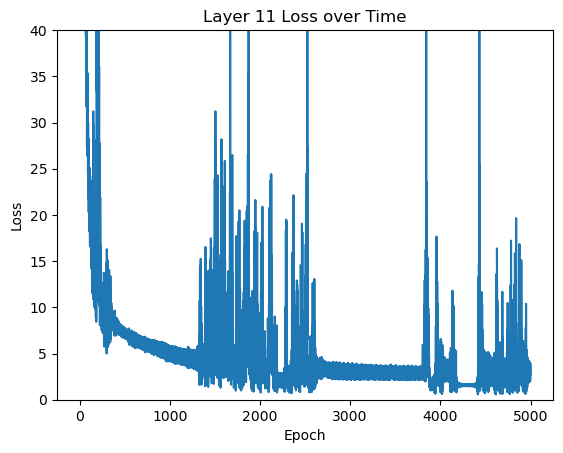

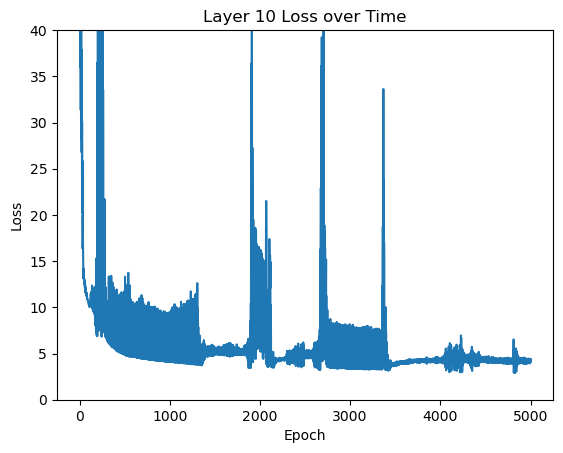

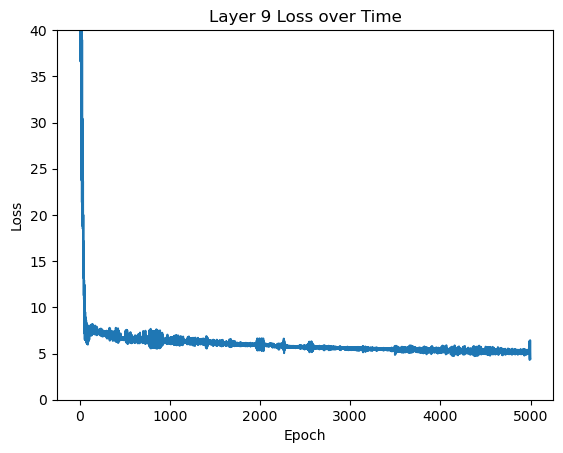

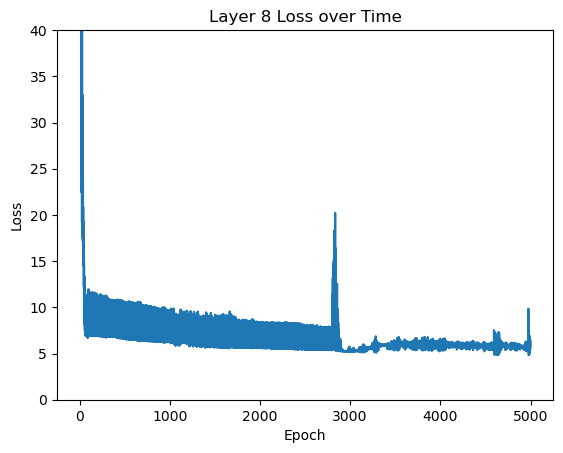

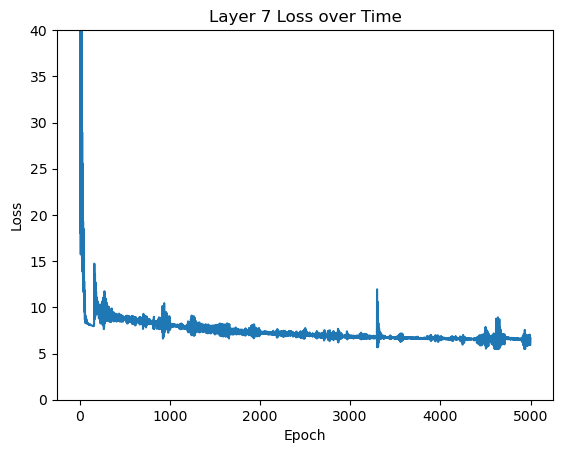

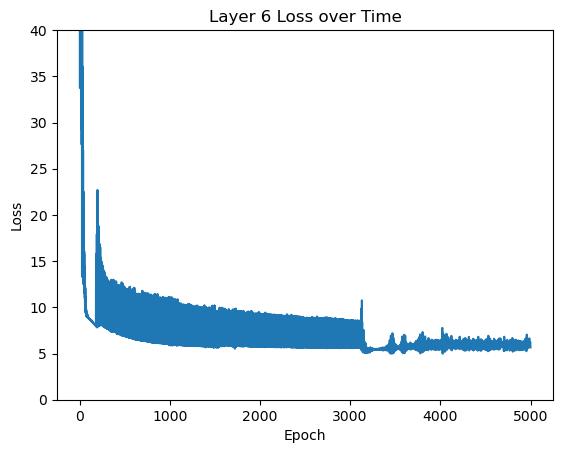

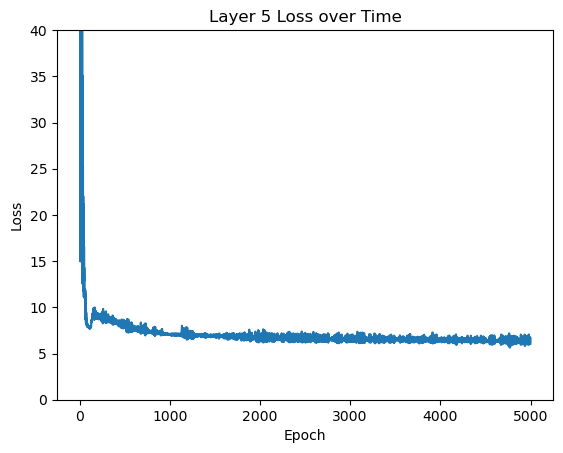

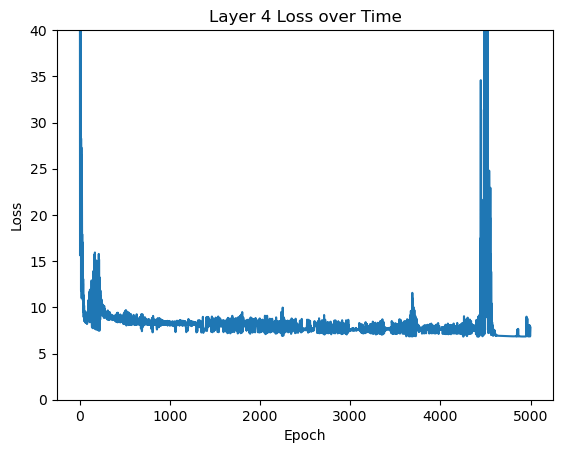

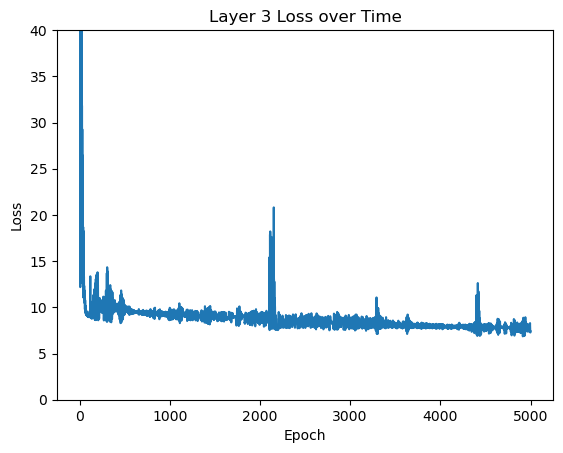

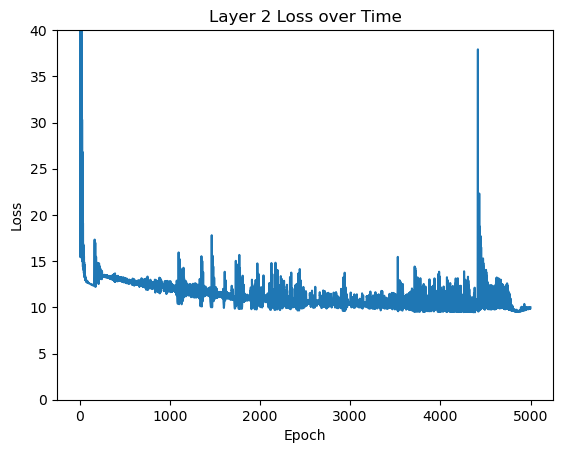

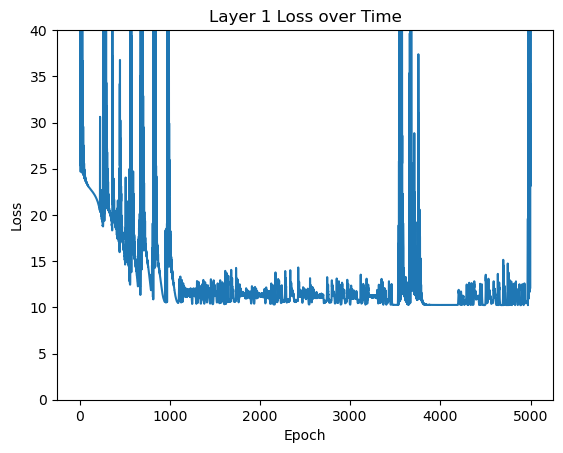

In [ ]:
# plot loss over time for each layer
for i in range(num_layers):
    layer = 11 - i
    plt.plot(loss_lists[f'loss_list{layer}'])
    
    plt.title(f'Layer {layer} Loss over Time')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # limit graph to max loss of 40 (otherwise scale is decieving)
    plt.ylim(0, 40)

    plt.show()

[10.231005668640137, 9.463754653930664, 6.855064392089844, 6.831226348876953, 5.631203651428223, 4.983783721923828, 5.495884418487549, 4.8317413330078125, 4.306990623474121, 2.884369373321533, 0.5698563456535339]


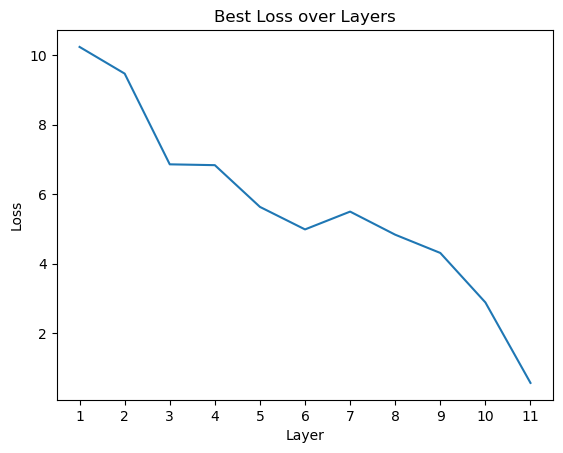

In [ ]:
# plot the best loss for each layer
best_losses.reverse()
print(best_losses)
plt.plot(range(1, len(best_losses) + 1), best_losses)

plt.title("Best Loss over Layers")
plt.xlabel("Layer")
plt.ylabel("Loss")

plt.xticks(range(1, 12))

plt.show()

# Testing 

In [ ]:
import matplotlib.pyplot as plt

# plot temperature predictions vs actual readings
def plot_actual_vs_pred(pred, actual):
    # specify number of samples to graph
    num_graphs = 10
    chunk_size = len(pred) // num_graphs

    # Create an appropriate number of plots
    for i in range(0, len(pred), chunk_size):
        plt.figure()
        
        plt.plot(pred[i], label='Predicted')
        plt.plot(actual[i], label='Actual')

        plt.title("Temperature: Predicted vs Actual")
        plt.xlabel("Silica Layer")
        plt.ylabel("Temperature (K)")
        
        plt.legend()
        plt.show()

Layer 11
sample_predictions: [298.9884338378906]
Layer 10
sample_predictions: [298.9884338378906, 322.3208312988281]
Layer 9
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625]
Layer 8
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1322937011719]
Layer 7
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1322937011719, 323.626953125]
Layer 6
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1322937011719, 323.626953125, 321.6954345703125]
Layer 5
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1322937011719, 323.626953125, 321.6954345703125, 322.2562561035156]
Layer 4
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1322937011719, 323.626953125, 321.6954345703125, 322.2562561035156, 318.1343994140625]
Layer 3
sample_predictions: [298.9884338378906, 322.3208312988281, 324.38092041015625, 327.1

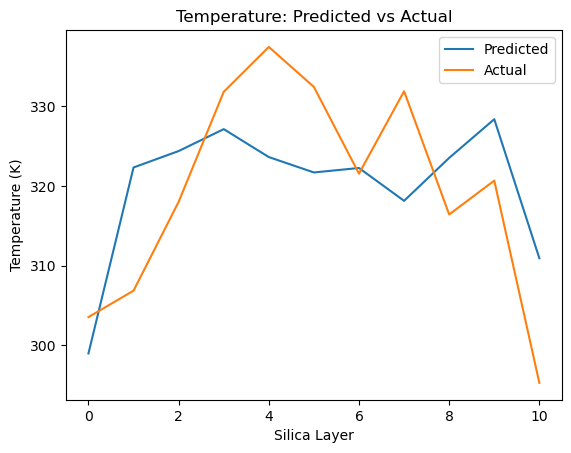

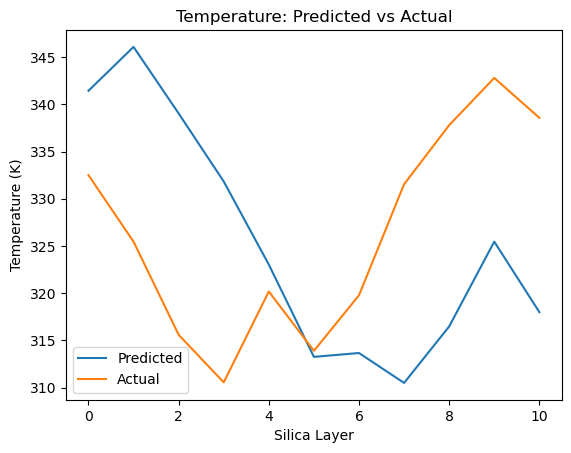

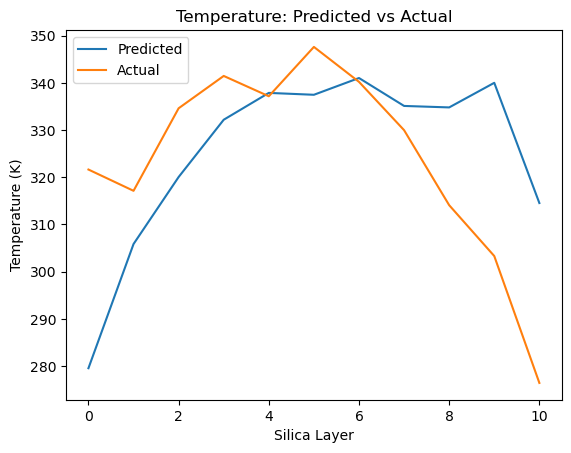

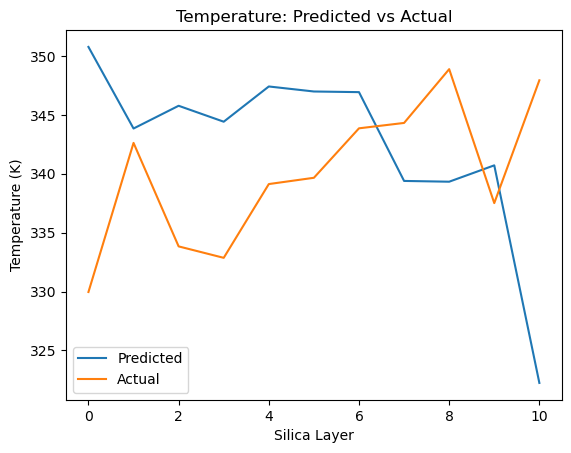

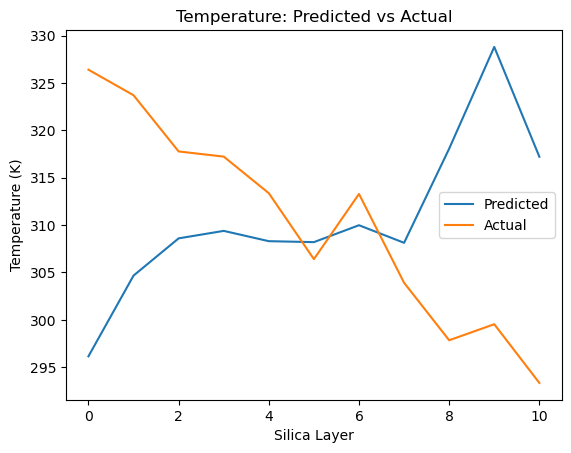

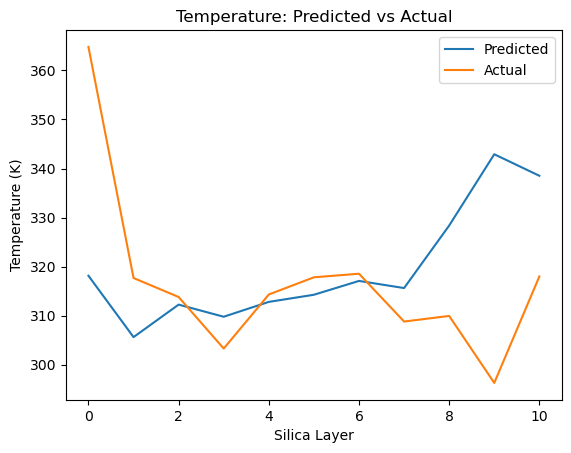

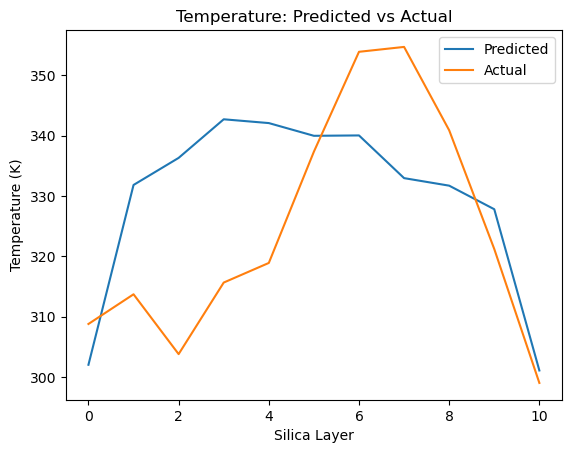

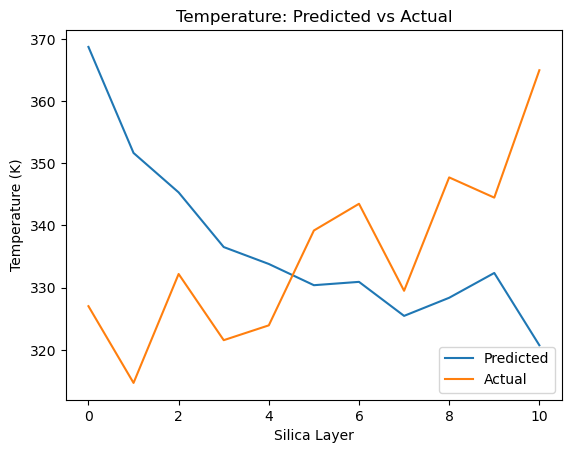

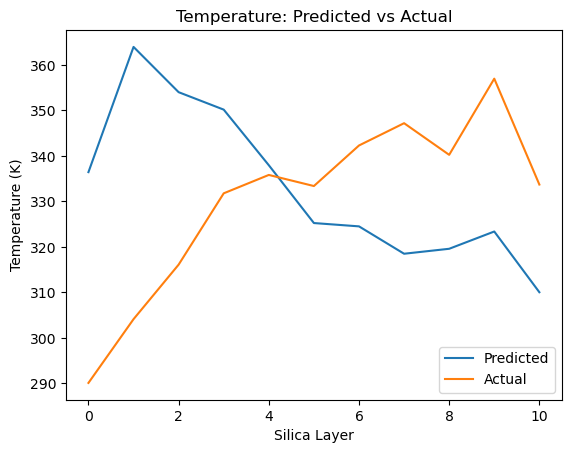

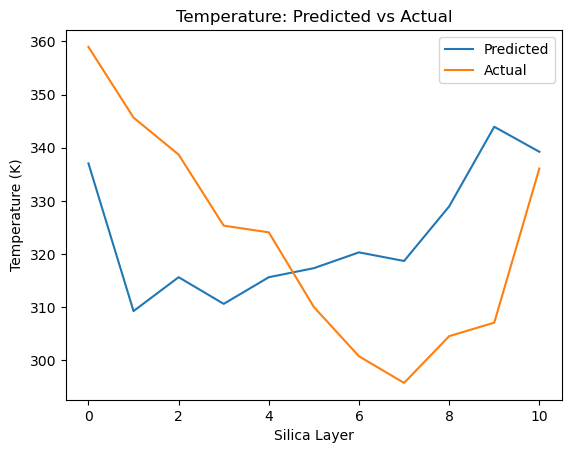

In [ ]:
# convert testing data to tensor
inputs = df_to_tensor(X_test)

# define prediction list (contains sublists for each sample) 
predictions = []

with torch.no_grad():
    for sample in inputs:
        # define new sample prediction list for each sample
        sample_prediction = []

        # iterate through layers to make temperature predictions for each layer sequentially
        for i in range(num_layers):
            layer = 11 - i
            print(f'Layer {layer}')

            # add previous layer's temperature prediction to inputs
            if i > 0:
                layer_pred_reshaped = layer_pred.reshape(1, -1)
                sample_reshaped = sample.reshape(1,-1)
                sample = torch.cat([sample_reshaped, layer_pred_reshaped], dim = 1)

            # define the model corresponding to the given layer
            model = models[f'model{layer}']

            # get temperature prediction and add to sample_prediction list
            layer_pred = model(sample)
            sample_prediction.append(layer_pred.item())
            print(f'sample_predictions: {sample_prediction}')
        
        # once all layers in a given sample have been predicted, add sublist to predictions list
        predictions.append(sample_prediction)

# plot results
actual = df_to_tensor(y_test).tolist()
plot_actual_vs_pred(predictions, actual)
